In [1]:
import json
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
scores={}
for i in glob('*/scores.json'):
    print(os.path.dirname(i))
    with open(i,'r') as f:
        scores[os.path.dirname(i)]=json.load(f)

16_0.1
ALL
16_0.5
16_0.3
5


In [3]:
dfmelt=[]
for k,v in scores.items():
    df=pd.DataFrame.from_dict(v).loc[['R2_train','R2_test']].rename(index={'R2_train':'Train','R2_test':'Test'})
    df.columns=[df.columns,[k]*len(df.columns)]
    dfmelt.append(df.melt(value_vars=df.columns.tolist(),ignore_index=False))
dfmelt=pd.concat(dfmelt).reset_index().rename(columns={'index':'Data','variable_0':'Model','variable_1':'Feature Set','value':"R$^{2}$"})

In [33]:
learningcurvedf=pd.concat([dfmelt[dfmelt['Feature Set']==j].replace(j,float(j.split('_')[1])) for j in set([i for i in dfmelt['Feature Set'] if '16' in i])])

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_16357/915395742.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  learningcurvedf=pd.concat([dfmelt[dfmelt['Feature Set']==j].replace(j,float(j.split('_')[1])) for j in set([i for i in dfmelt['Feature Set'] if '16' in i])])


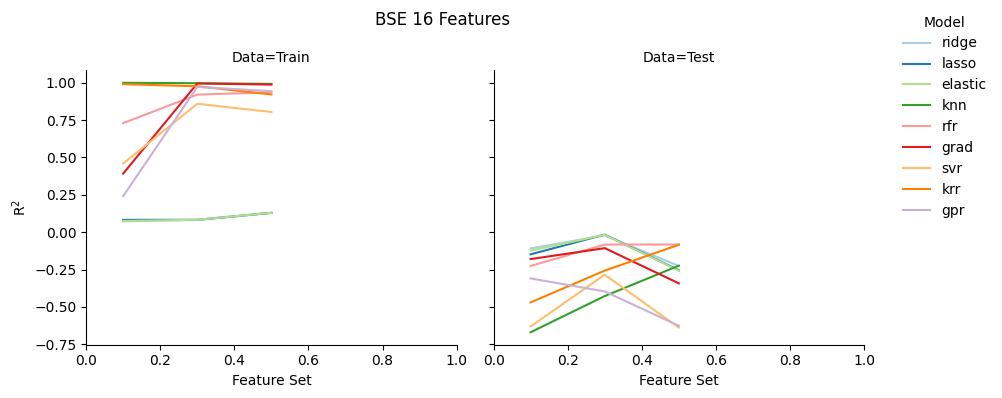

In [51]:


g=sns.relplot(learningcurvedf,
            kind='line',
            x='Feature Set',
            y='R$^{2}$',
            hue='Model',
            col='Data',
            height=4, aspect=1, col_wrap=2,palette=sns.color_palette("Paired",9)
            )
# axes = g.axes.flatten()
# axes[0].axhline(10, ls='--')
# axes[1].axhline(30, ls='--')
# g.set_axis_labels("Training Set Ratio", "R$^{2}$")
g.set_titles("{col_var}={col_name}")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(xlim=(0, 1))
g.fig.suptitle(f"BSE 16 Features")
# plt.title(f"{name}")
plt.tight_layout()
# plt.savefig(f'{name}.png',dpi=300,bbox_inches='tight')
plt.show()

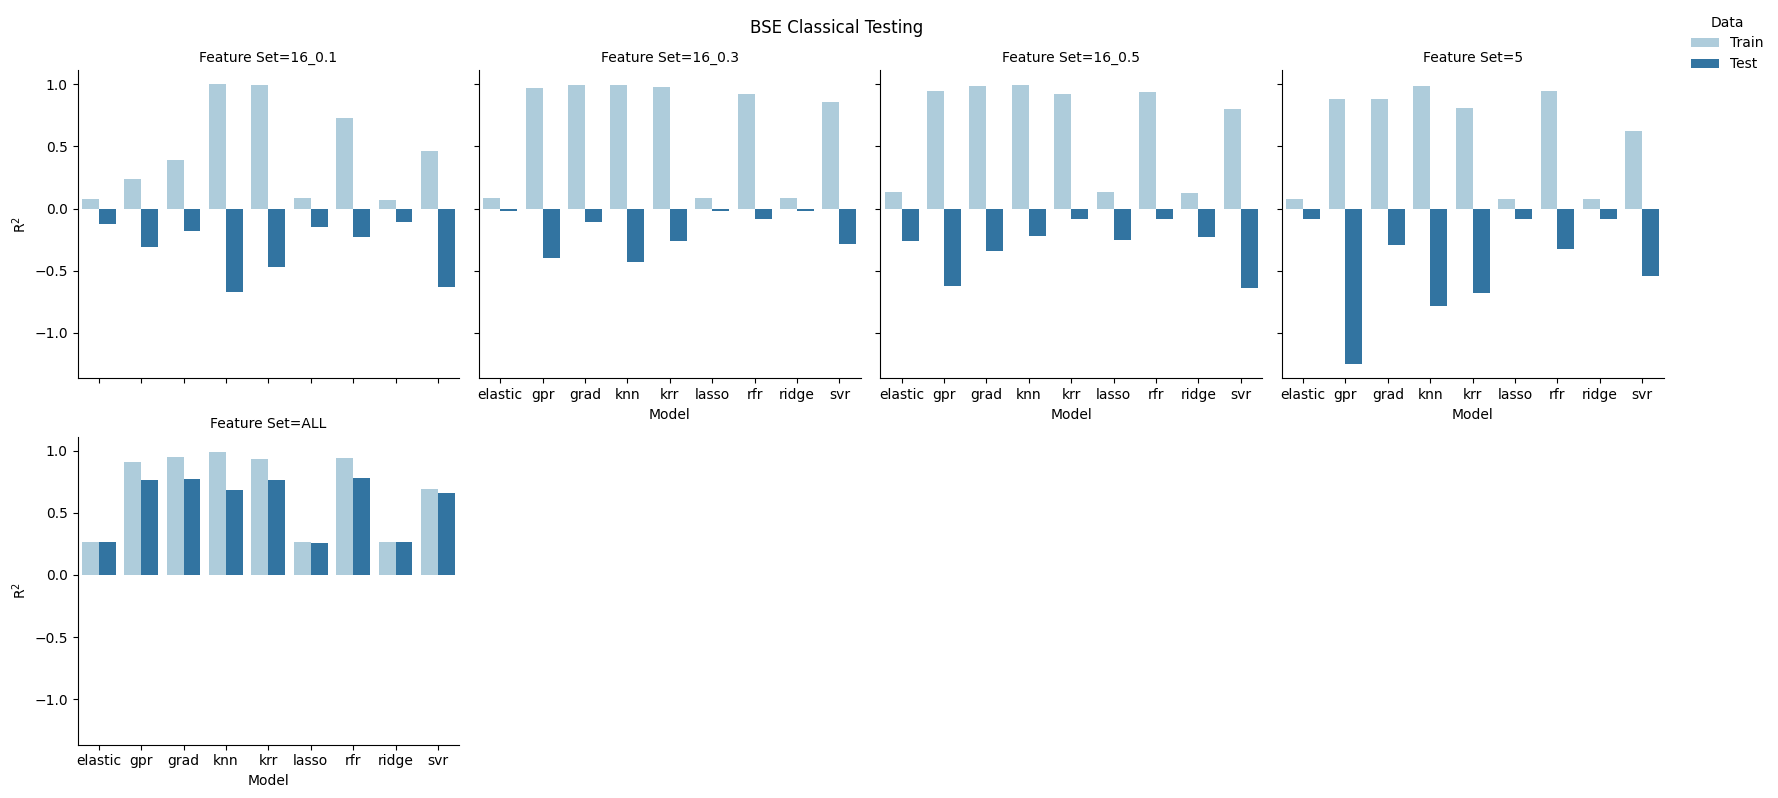

In [4]:
g=sns.catplot(dfmelt.reset_index().sort_values(by=['Feature Set','Model']),
             kind='bar',
             x='Model',
              y='R$^{2}$',
              hue='Data',
              col='Feature Set',
              height=4, aspect=1, col_wrap=4,palette=sns.color_palette("Paired",2)
             )

# g.set_axis_labels("Training Set Ratio", "R$^{2}$")
g.set_titles("{col_var}={col_name}")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
# g.set(ylim=(0, 1))
g.fig.suptitle(f"BSE Classical Testing")
# plt.title(f"{name}")
plt.tight_layout()
# plt.savefig(f'{name}.png',dpi=300,bbox_inches='tight')
plt.show()